In [19]:
import pandas as pd # Librería para manejar los datos
import numpy as np # Librería para los calculos numéricos
import matplotlib.pyplot as plt # Librería para graficar
import seaborn as sns # Libreria para realizar las gráficas con estilo 
from sklearn.model_selection import train_test_split # Libreria de Sklearn para dividir los datos en test y tranin
from sklearn.linear_model import LinearRegression # Modelo de Regresión Lineal
from sklearn.model_selection import GridSearchCV # Librería para la busqueda de hiperparpárametros
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Métricas para evaluar el modelo
from sklearn.preprocessing import StandardScaler # Librería para escalar los datos

In [20]:
datos = pd.read_csv("D:/DocumentsD/ecbd/2daevaluacion/data/beisbol.csv") # Cargamos los datos

x = datos[['bateos']] # Variable independiente
y = datos['runs'] # Variable dependiente

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,) # Dividimos las datos de entrenamiento y prueba
print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")


Tamaño del conjunto de entrenamiento: 21 muestras


In [6]:
modelo = LinearRegression() # Creamos el modelo de regresióin lineal
modelo.fit(X_train, y_train) # Entrenamos el modelo
result = modelo.score(X_train, y_train) # Evaluamos el modelo con los datos de prueba

In [7]:
print("Score del 1er modelo: ", result)

Score del 1er modelo:  0.17368893217800152


In [8]:
y_pred = modelo.predict(X_test) # Realizamos la predicción del modelo

In [9]:
mae = mean_absolute_error(y_test, y_pred) # Calculamos el MAE (Error Absoluto Medio)
mse = mean_squared_error(y_test, y_pred) # Calculamos el MSE (Error Cuadrático Medio)
rmse = np.sqrt(mse) # Calculamos el RMSE (Raíz del Error Cuadrático Medio)
r2 = r2_score(y_test, y_pred) # Cualculamos R cuadrada

print("\nMétricas - 1er Modelo")
print(f"MAE (Error Absoluto Medio):  {mae:.4f}")
print(f"MSE (Error Cuadrático Medio):  {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R²: {r2:.4f}")


Métricas - 1er Modelo
MAE (Error Absoluto Medio):  61.1641
MSE (Error Cuadrático Medio):  4562.9524
RMSE (Raíz del Error Cuadrático Medio): 67.5496
R²: 0.5482


In [10]:
scaler = StandardScaler() # Comenzamos con la optimización del modelo

In [11]:
X_train_scaled = scaler.fit_transform(X_train) # Escalamos los datos de entrenamiento
X_test_scaled  = scaler.transform(X_test) # Escalamos los datos de prueba

In [12]:
modelo2 = LinearRegression() # Creamos un nuevo modelo de regresión lineal
modelo2.fit(X_train_scaled, y_train) # Entrenamos el nuevo modelo con los datos escalados

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
result2 = modelo2.score(X_train_scaled, y_train) # Evaluamos el nuevo score del modelo de datos
print("Score del 2do modelo: ", result2)

Score del 2do modelo:  0.17368893217800185


In [14]:
y_pred2 = modelo2.predict(X_test_scaled) # Realizamos la predicción del nuevo modelo

In [15]:
mae2 = mean_absolute_error(y_test, y_pred2) # Calculamos el MAE del nuevo modelo
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2)) # Calculamos el RMSE dek nuevo modelo
r22 = r2_score(y_test, y_pred2) # Calculamos R cuadrada del nuevo modelo

print("\nMétricas - 2do Modelo")
print(f"MAE (Error Absoluto Medio):  {mae2:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse2:.4f}")
print(f"R²: {r22:.4f}")

print("\nOptimización Básica del Modelo - Escalado de Datos")
print("Modelo sin escalar:") 
print(f"RMSE = {rmse:.4f} | R² = {r2:.4f}") # Resultados del primer modelo

print("\nModelo con escalado:")
print(f"RMSE = {rmse2:.4f} | R² = {r22:.4f}") # Resultados de segundo modelo ya optimizado

mejor = "2do Modelo" if r22 > r2 else "1er Modelo"
print(f"\nEl mejor modelo es: {mejor}") # Comparación de ambos modelos y el mejor


Métricas - 2do Modelo
MAE (Error Absoluto Medio):  61.1641
RMSE (Raíz del Error Cuadrático Medio): 67.5496
R²: 0.5482

Optimización Básica del Modelo - Escalado de Datos
Modelo sin escalar:
RMSE = 67.5496 | R² = 0.5482

Modelo con escalado:
RMSE = 67.5496 | R² = 0.5482

El mejor modelo es: 1er Modelo


In [16]:
print("\nHiperparámetros")
# Definimos los hiperparámetros que queremos probar en el modelo LinearRegression
parametros = {
    "fit_intercept": [True, False], # Probar con y sin término independiente
    "positive": [True, False] # Probar si forzamos coeficientes positivos o no
}

# Configuramos GridSearchCV para buscar la mejor combinación de hiperparámetros
grid = GridSearchCV(
    estimator=LinearRegression(), # Modelo base
    param_grid=parametros, # Diccionario con hiperparámetros a evaluar
    scoring='neg_mean_squared_error', # Métrica para evaluar cada combinación
    cv=5 # Validación cruzada con 5 particiones
)

grid.fit(X_train_scaled, y_train) # Entrenamos la búsqueda usando los datos escalados
print("\nMejores parámetros encontrados:", grid.best_params_)


Hiperparámetros

Mejores parámetros encontrados: {'fit_intercept': True, 'positive': True}


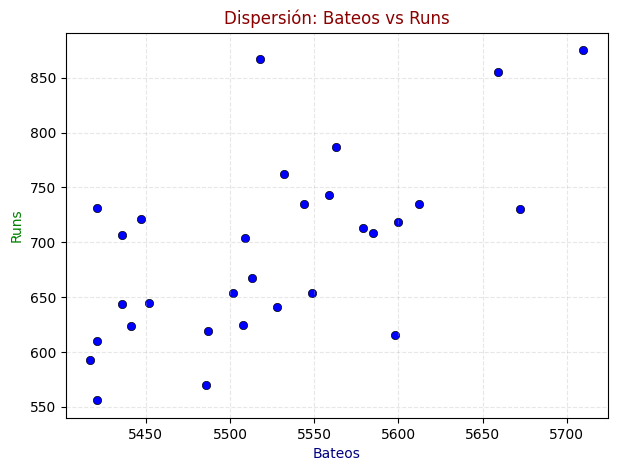

In [17]:
# Gráfica — Dispersión de datos
plt.figure(figsize=(7,5)) # Tamaño de la figura de la gráfica
sns.scatterplot(
x=datos['bateos'], 
y=datos['runs'],
color='blue',      # Color para los puntos
edgecolor='black'  # Contorno
)
plt.title("Dispersión: Bateos vs Runs", color='darkred')
plt.xlabel("Bateos", color='navy')
plt.ylabel("Runs", color='green')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show() # Mostramos la gráfica

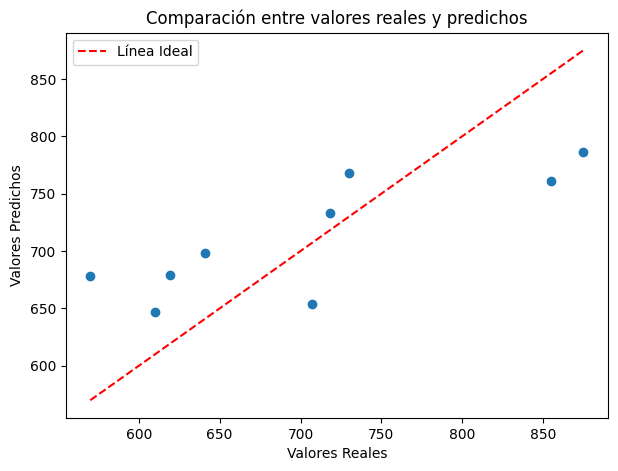

In [18]:
# Gráfica — Reales vs Predichos
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label="Línea Ideal")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre valores reales y predichos")
plt.legend()
plt.show()